# Klasifikasi

In [1]:
# klassifikasi produk asuransi menggunakan Logistic Regression
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec
# train test split
from sklearn.model_selection import train_test_split
# nkltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
df = pd.read_csv('Fix_Dataset/asuransi_clean.csv')

In [27]:
df.head()

,created_at,full_text,username,Produk,rate
0,2023-09-25,"['1', '5', 'juta', 'sist', 'kantor', 'sih', 'j...",Ditanyadia,AIA,2
1,2023-09-22,"['mohon', 'klarifikasi', 'dari', 'asuransi', '...",MuhTaufikRahmat,AIA,2
2,2023-09-21,"['indonesia', 'unit', 'link', '5', 'tips', 'se...",fiona99351131,AIA,2
3,2023-09-21,"['halo', 'bang', 'maaf', 'nimbrung', 'pesan', ...",fiayeee,AIA,2
4,2023-09-18,"['impactnya', 'rumah', 'sakit', 'rekan', 'reka...",filcadet,AIA,1


In [30]:
df['Produk'].value_counts().sort_values(ascending=True)

Produk
AIA           263
Prudential    302
BNI Life      540
Allianz       585
Manulife      715
Cigna         816
Name: count, dtype: int64

In [37]:
# encoding label kategori produk asuransi menggunakan dictionary

label = { 'AIA' : 0, 'Allianz' : 1, 'Prudential' : 2, 'BNI Life' : 3, 'Manulife' : 4, 'Cigna' : 5 }

df['label'] = df['Produk'].replace(label)

In [38]:
df.head()

,created_at,full_text,username,Produk,rate,label
0,2023-09-25,"['1', '5', 'juta', 'sist', 'kantor', 'sih', 'j...",Ditanyadia,AIA,2,0
1,2023-09-22,"['mohon', 'klarifikasi', 'dari', 'asuransi', '...",MuhTaufikRahmat,AIA,2,0
2,2023-09-21,"['indonesia', 'unit', 'link', '5', 'tips', 'se...",fiona99351131,AIA,2,0
3,2023-09-21,"['halo', 'bang', 'maaf', 'nimbrung', 'pesan', ...",fiayeee,AIA,2,0
4,2023-09-18,"['impactnya', 'rumah', 'sakit', 'rekan', 'reka...",filcadet,AIA,1,0


<Axes: xlabel='label'>

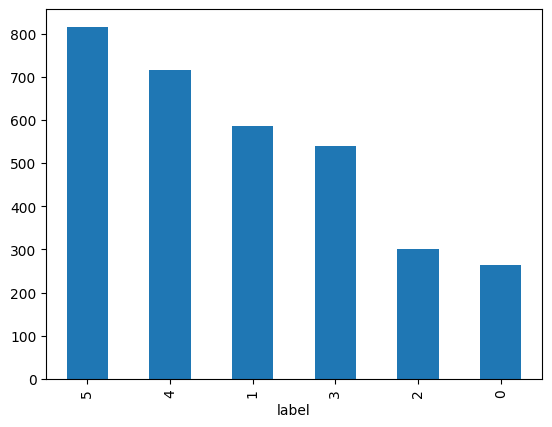

In [39]:
df['label'].value_counts().plot(kind='bar')

In [40]:
# split data
X = df['full_text']
y = df['label']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
sentences = [word_tokenize(text.lower()) for text in X_train]
word2vec = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

def text_to_vector(text):
    tokens = word_tokenize(text.lower())
    vector = np.zeros(100)
    count = 0
    for word in tokens:
        if word in word2vec.wv:
            vector += word2vec.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

In [43]:
# Mengubah data teks menjadi representasi vektor
X_train_vector = [text_to_vector(text) for text in X_train]
X_test_vector = [text_to_vector(text) for text in X_test]

In [44]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vector, y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_pred = model.predict(X_test_vector)

In [46]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Logistic Regression:", accuracy)

Akurasi model Logistic Regression: 0.5782945736434109


In [47]:
# membandingkan menggunakan pipeline tfidf dan word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Membuat pipeline dengan TfidfVectorizer dan Logistic Regression
pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

In [48]:
# Membuat pipeline dengan Word2Vec dan Logistic Regression
pipeline_w2v = Pipeline([
    ('clf', LogisticRegression(max_iter=1000))
])

In [49]:
# Melatih model dengan pipeline tfidf
pipeline_tfidf.fit(X_train, y_train)
y_pred_tfidf = pipeline_tfidf.predict(X_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Akurasi model Logistic Regression dengan TF-IDF:", accuracy_tfidf)

Akurasi model Logistic Regression dengan TF-IDF: 0.9255813953488372


In [50]:
# Melatih model dengan pipeline word2vec
pipeline_w2v.fit(X_train_vector, y_train)
y_pred_w2v = pipeline_w2v.predict(X_test_vector)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
print("Akurasi model Logistic Regression dengan Word2Vec:", accuracy_w2v)

Akurasi model Logistic Regression dengan Word2Vec: 0.5782945736434109


In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Membuat pipeline dengan TfidfVectorizer dan KNN
pipeline_tfidf_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

# Membuat pipeline dengan Word2Vec dan KNN
pipeline_w2v_knn = Pipeline([
    ('clf', KNeighborsClassifier())
])

In [52]:
# Melatih model dengan pipeline tfidf
pipeline_tfidf_knn.fit(X_train, y_train)
y_pred_tfidf_knn = pipeline_tfidf_knn.predict(X_test)
accuracy_tfidf_knn = accuracy_score(y_test, y_pred_tfidf_knn)
print("Akurasi model KNN dengan TF-IDF:", accuracy_tfidf_knn)

Akurasi model KNN dengan TF-IDF: 0.7565891472868217


In [53]:
# Melatih model dengan pipeline word2vec
pipeline_w2v_knn.fit(X_train_vector, y_train)
y_pred_w2v_knn = pipeline_w2v_knn.predict(X_test_vector)
accuracy_w2v_knn = accuracy_score(y_test, y_pred_w2v_knn)
print("Akurasi model KNN dengan Word2Vec:", accuracy_w2v_knn)

Akurasi model KNN dengan Word2Vec: 0.524031007751938


In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat pipeline dengan TfidfVectorizer dan Decision Tree
pipeline_tfidf_dt = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Membuat pipeline dengan Word2Vec dan Decision Tree
pipeline_w2v_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

In [55]:
# Melatih model dengan pipeline tfidf
pipeline_tfidf_dt.fit(X_train, y_train)
y_pred_tfidf_dt = pipeline_tfidf_dt.predict(X_test)
accuracy_tfidf_dt = accuracy_score(y_test, y_pred_tfidf_dt)
print("Akurasi model Decision Tree dengan TF-IDF:", accuracy_tfidf_dt)

Akurasi model Decision Tree dengan TF-IDF: 0.9085271317829458


In [56]:
# Melatih model dengan pipeline word2vec
pipeline_w2v_dt.fit(X_train_vector, y_train)
y_pred_w2v_dt = pipeline_w2v_dt.predict(X_test_vector)
accuracy_w2v_dt = accuracy_score(y_test, y_pred_w2v_dt)
print("Akurasi model Decision Tree dengan Word2Vec:", accuracy_w2v_dt)

Akurasi model Decision Tree dengan Word2Vec: 0.48992248062015503


In [57]:
# upload model logistic regression dengan tfidf dan word2vec menggunakan pickle
import pickle

# Simpan model dengan pickle ke dalam folder model
with open('Model/logistic_regression_tfidf.pkl', 'wb') as file:
    pickle.dump(pipeline_tfidf, file)

with open('Model/logistic_regression_w2v.pkl', 'wb') as file:
    pickle.dump(pipeline_w2v, file)